<a href="https://colab.research.google.com/github/jayabonelli/team-city/blob/master/mchacks_channel_capacity_value_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
!ls '/content/drive/My Drive/collab_notebooks/hack_mcgill'

experimental_data.pkl  mcgill_hackathon.ipynb


In [0]:
google_drive = '/content/drive/My Drive/collab_notebooks/hack_mcgill'

In [0]:
import pandas as pd
import numpy as np
import sklearn


In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
%matplotlib inline

In [0]:
from IPython.display import display

In [235]:
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)


1.14.6
0.22.0
0.20.2


In [236]:

mart_df = pd.read_pickle(google_drive + '/experimental_data.pkl')
mart_df = mart_df.dropna(how='all')
mart_df

acme                                         globex  \
           bandwidth_kbps jitter_ms loss_percent rssi_dbm bandwidth_kbps   
1544641822            NaN       NaN          NaN    -57.0          792.0   
1544641824          790.0    78.879          0.0    -57.0            NaN   
1544641826          792.0    84.063          0.0    -57.0          798.0   
1544641829          797.0    84.471          0.0    -57.0          789.0   
1544641833          791.0    84.136          0.0    -57.0            NaN   
1544641835            NaN       NaN          NaN    -57.0          798.0   
1544641840          793.0    84.104          0.0    -57.0          792.0   
1544641842            NaN       NaN          NaN    -57.0          799.0   
1544641844          794.0    84.071          0.0    -57.0            NaN   
1544641846            NaN       NaN          NaN    -57.0            NaN   
1544641847          793.0    84.522          0.0    -57.0          793.0   
1544641848          790.0    78.827          0.0    -57.0          796.0   
1544641849          796.0    84.065          0.0    -57.0            NaN   
1544641851          797.0    84.111          0.0    -57.0            NaN   
1544641852          795.0   115.679          0.0    -57.0            NaN   
1544641853            NaN       NaN          NaN    -57.0          796.0   
1544641855            NaN       NaN          NaN    -57.0          789.0   
1544641856          795.0    84.515          0.0    -57.0            NaN   
1544641858            NaN       NaN          NaN    -57.0            NaN   
1544641860          793.0    84.095          0.0    -57.0          797.0   
1544641861            NaN       NaN          NaN    -57.0            NaN   
1544641862          789.0    79.278          0.0    -57.0          790.0   
1544641863          799.0    84.071          0.0    -57.0          789.0   
1544641865          795.0    89.683          0.0    -57.0            NaN   
1544641867          797.0    84.103          0.0    -57.0          799.0   
1544641869          791.0    78.871          0.0    -57.0          790.0   
1544641870          792.0    78.887          0.0    -57.0          798.0   
1544641871          796.0    84.340          0.0    -57.0            NaN   
1544641872            NaN       NaN          NaN    -57.0          799.0   
1544641874          790.0    78.786          0.0    -57.0            NaN   
...                   ...       ...          ...      ...            ...   
1544646517            NaN       NaN          NaN    -45.0          792.0   
1544646521            NaN       NaN          NaN    -45.0            NaN   
1544646526          798.0    95.776          0.0    -45.0            NaN   
1544646531          793.0   101.807          0.0    -45.0            NaN   
1544646535            NaN       NaN          NaN    -45.0            NaN   
1544646537            NaN       NaN          NaN    -45.0            NaN   
1544646539            NaN       NaN          NaN    -45.0            NaN   
1544646540            NaN       NaN          NaN    -45.0            NaN   
1544646542          799.0    78.996          0.0    -45.0            NaN   
1544646544          790.0    70.117          0.0    -45.0            NaN   
1544646547            NaN       NaN          NaN    -45.0            NaN   
1544646549            NaN       NaN          NaN    -45.0            NaN   
1544646552            NaN       NaN          NaN    -45.0            NaN   
1544646555            NaN       NaN          NaN    -45.0            NaN   
1544646558            NaN       NaN          NaN    -45.0            NaN   
1544646560            NaN       NaN          NaN    -52.0            NaN   
1544646561          789.0    95.783          0.0    -52.0            NaN   
1544646567            NaN       NaN          NaN    -52.0            NaN   
1544646569            NaN       NaN          NaN    -52.0            NaN   
1544646571            NaN       NaN          NaN    -52.0            

In [237]:
def loss_nonzero_checker(provider_str):
  prov_ser_loss = pd.Series(mart_df[(provider_str, 'loss_percent')])
  nonzeros_prov_mart = [i for i in prov_ser_loss.index if not np.isnan(prov_ser_loss.loc[i]) and prov_ser_loss.loc[i] != 0.0]
  
  if len(nonzeros_prov_mart) != 0:
    print("NOT all nonzero --- printing...")
    print("Indices -- ", nonzeros_prov_mart)
    for idx in nonzeros_prov_mart:
      print("Val at (mart_df)", idx, " :\n", mart_df.loc[idx, (provider_str, 'loss_percent')])

  prov_nansdropped = prov_ser_loss.dropna()
  nonzeros_extracted = prov_nansdropped.nonzero()
  print("Val at (nonzeros_acme)", idx, " :\n\n", [(i, prov_nansdropped.iloc[i]) for i in nonzeros_extracted])



loss_nonzero_checker('acme')
print('\n')
loss_nonzero_checker('globex')
print('\n')
loss_nonzero_checker('octan')


NOT all nonzero --- printing...
Indices --  ['1544642558', '1544646041']
Val at (mart_df) 1544642558  :
 2.1
Val at (mart_df) 1544646041  :
 3.1
Val at (nonzeros_acme) 1544646041  :

 [(array([262, 978]), 1544642558    2.1
1544646041    3.1
Name: (acme, loss_percent), dtype: float64)]


NOT all nonzero --- printing...
Indices --  ['1544642079', '1544642333', '1544643171', '1544643635', '1544643644', '1544644088', '1544644404']
Val at (mart_df) 1544642079  :
 1.1
Val at (mart_df) 1544642333  :
 2.1
Val at (mart_df) 1544643171  :
 2.3
Val at (mart_df) 1544643635  :
 1.1
Val at (mart_df) 1544643644  :
 3.4
Val at (mart_df) 1544644088  :
 2.0
Val at (mart_df) 1544644404  :
 2.2
Val at (nonzeros_acme) 1544644404  :

 [(array([118, 223, 452, 580, 582, 686, 758]), 1544642079    1.1
1544642333    2.1
1544643171    2.3
1544643635    1.1
1544643644    3.4
1544644088    2.0
1544644404    2.2
Name: (globex, loss_percent), dtype: float64)]


NOT all nonzero --- printing...
Indices --  ['1544642618'

In [238]:
bw_gps = mart_df.groupby([('acme', 'bandwidth_kbps'), 
                          ('globex', 'bandwidth_kbps'), 
                          ('octan', 'bandwidth_kbps')])

bw_set = set()

for grp_val, df in bw_gps:
  bw_set.add(grp_val)
  
print('Group Bandwidth:', bw_set, '\n', 'length = ', len(bw_set))
print('All bandwidths larger than 600 kbps : ', 
     all(i > 600 and j > 600 and k > 600 for (i, j, k) in bw_set))


Group Bandwidth: {(797.0, 799.0, 799.0), (797.0, 792.0, 789.0), (793.0, 790.0, 795.0), (792.0, 792.0, 795.0), (797.0, 792.0, 797.0), (796.0, 796.0, 799.0), (794.0, 792.0, 794.0), (798.0, 798.0, 794.0), (798.0, 797.0, 792.0), (789.0, 793.0, 792.0), (793.0, 799.0, 791.0), (791.0, 794.0, 789.0), (797.0, 793.0, 790.0), (796.0, 798.0, 796.0), (795.0, 790.0, 798.0), (793.0, 792.0, 792.0), (792.0, 791.0, 794.0), (791.0, 797.0, 793.0), (796.0, 795.0, 795.0), (798.0, 790.0, 799.0), (791.0, 793.0, 789.0), (791.0, 794.0, 797.0), (795.0, 795.0, 794.0), (797.0, 793.0, 798.0), (796.0, 794.0, 790.0), (798.0, 796.0, 795.0), (790.0, 792.0, 792.0), (793.0, 790.0, 788.0), (797.0, 794.0, 789.0), (796.0, 797.0, 795.0), (792.0, 795.0, 792.0), (790.0, 798.0, 791.0), (791.0, 796.0, 793.0), (797.0, 789.0, 792.0), (796.0, 794.0, 798.0), (794.0, 793.0, 790.0), (793.0, 795.0, 794.0), (797.0, 797.0, 789.0), (797.0, 794.0, 797.0), (792.0, 789.0, 788.0), (793.0, 796.0, 798.0), (795.0, 797.0, 797.0), (795.0, 791.0, 7

In [239]:
from math import log10

def compute_phase_noise(val):
  if ~np.isnan(val) and val != 0:
    #print(val)
    return 10*log10((1 / (val*(10 ** -3))) / (40e6))



mart_df_expanded = pd.DataFrame(mart_df)
mart_df_expanded[('acme', 'phase_noise_dBc')] = mart_df[('acme', 'jitter_ms')].apply(compute_phase_noise)
mart_df_expanded[('globex', 'phase_noise_dBc')] = mart_df[('globex', 'jitter_ms')].apply(compute_phase_noise)
mart_df_expanded[('octan', 'phase_noise_dBc')] = mart_df[('octan', 'jitter_ms')].apply(compute_phase_noise)

mart_df_expanded[('acme', 'noise_dBm')] = mart_df[('acme', 'phase_noise_dBc')].apply(lambda x : x + 30)
mart_df_expanded[('globex', 'noise_dBm')] = mart_df[('globex', 'phase_noise_dBc')].apply(lambda x : x + 30)
mart_df_expanded[('octan', 'noise_dBm')] = mart_df[('octan', 'phase_noise_dBc')].apply(lambda x : x + 30)

mart_df_expanded[('acme', 'channel_capacity_bps')] = (40e6) * np.log2(1 + (mart_df[('acme', 'rssi_dbm')] / mart_df[('acme', 'noise_dBm')]))
mart_df_expanded[('globex', 'channel_capacity_bps')] = (40e6) * np.log2(1 + (mart_df[('globex', 'rssi_dbm')] / mart_df[('globex', 'noise_dBm')]))
mart_df_expanded[('octan', 'channel_capacity_bps')] = (40e6) * np.log2(1 + (mart_df[('octan', 'rssi_dbm')] / mart_df[('octan', 'noise_dBm')]))

mart_df_expanded
         

acme                                         globex  \
           bandwidth_kbps jitter_ms loss_percent rssi_dbm bandwidth_kbps   
1544641822            NaN       NaN          NaN    -57.0          792.0   
1544641824          790.0    78.879          0.0    -57.0            NaN   
1544641826          792.0    84.063          0.0    -57.0          798.0   
1544641829          797.0    84.471          0.0    -57.0          789.0   
1544641833          791.0    84.136          0.0    -57.0            NaN   
1544641835            NaN       NaN          NaN    -57.0          798.0   
1544641840          793.0    84.104          0.0    -57.0          792.0   
1544641842            NaN       NaN          NaN    -57.0          799.0   
1544641844          794.0    84.071          0.0    -57.0            NaN   
1544641846            NaN       NaN          NaN    -57.0            NaN   
1544641847          793.0    84.522          0.0    -57.0          793.0   
1544641848          790.0    78.827          0.0    -57.0          796.0   
1544641849          796.0    84.065          0.0    -57.0            NaN   
1544641851          797.0    84.111          0.0    -57.0            NaN   
1544641852          795.0   115.679          0.0    -57.0            NaN   
1544641853            NaN       NaN          NaN    -57.0          796.0   
1544641855            NaN       NaN          NaN    -57.0          789.0   
1544641856          795.0    84.515          0.0    -57.0            NaN   
1544641858            NaN       NaN          NaN    -57.0            NaN   
1544641860          793.0    84.095          0.0    -57.0          797.0   
1544641861            NaN       NaN          NaN    -57.0            NaN   
1544641862          789.0    79.278          0.0    -57.0          790.0   
1544641863          799.0    84.071          0.0    -57.0          789.0   
1544641865          795.0    89.683          0.0    -57.0            NaN   
1544641867          797.0    84.103          0.0    -57.0          799.0   
1544641869          791.0    78.871          0.0    -57.0          790.0   
1544641870          792.0    78.887          0.0    -57.0          798.0   
1544641871          796.0    84.340          0.0    -57.0            NaN   
1544641872            NaN       NaN          NaN    -57.0          799.0   
1544641874          790.0    78.786          0.0    -57.0            NaN   
...                   ...       ...          ...      ...            ...   
1544646517            NaN       NaN          NaN    -45.0          792.0   
1544646521            NaN       NaN          NaN    -45.0            NaN   
1544646526          798.0    95.776          0.0    -45.0            NaN   
1544646531          793.0   101.807          0.0    -45.0            NaN   
1544646535            NaN       NaN          NaN    -45.0            NaN   
1544646537            NaN       NaN          NaN    -45.0            NaN   
1544646539            NaN       NaN          NaN    -45.0            NaN   
1544646540            NaN       NaN          NaN    -45.0            NaN   
1544646542          799.0    78.996          0.0    -45.0            NaN   
1544646544          790.0    70.117          0.0    -45.0            NaN   
1544646547            NaN       NaN          NaN    -45.0            NaN   
1544646549            NaN       NaN          NaN    -45.0            NaN   
1544646552            NaN       NaN          NaN    -45.0            NaN   
1544646555            NaN       NaN          NaN    -45.0            NaN   
1544646558            NaN       NaN          NaN    -45.0            NaN   
1544646560            NaN       NaN          NaN    -52.0            NaN   
1544646561          789.0    95.783          0.0    -52.0            NaN   
1544646567            NaN       NaN          NaN    -52.0            NaN   
1544646569            NaN       NaN          NaN    -52.0            NaN   
1544646571            NaN       NaN          NaN    -52.0            

In [240]:
loc_grp = mart_df.groupby(['latitude_deg', 'longitude_deg'])

xdata = list()
ydata = list()
zdata_acme = list()
zdata_globex = list()
zdata_octan = list()

# i = 0
# for grp_val, df in loc_grp:
#   print('\n', grp_val)
#   #display(df)
#   print('\n\n')
#   print(df.index)
#   print('\n\n')
#   if len(df.index) > 1:
#     print('BREAKING!!!!!!!!!!!!!!')
#     break
#   i += 1
#   if i == 50:
#     break


for grp_val, df in loc_grp: 
  xdata.append(grp_val[0])
  ydata.append(grp_val[1])
  zdata_acme.append(df[('acme', 'channel_capacity_bps')].mean())
  zdata_globex.append(df[('globex', 'channel_capacity_bps')].mean())
  zdata_octan.append(df[('octan', 'channel_capacity_bps')].mean())
  
#len(loc_grp)
print(len(xdata))
print(len(ydata))
print(len(zdata_acme))
print(len(zdata_globex))
print(len(zdata_octan))

1488
1488
1488
1488
1488


In [0]:
x_arr = np.array(xdata)
y_arr = np.array(ydata)
z_acme_arr = np.array(zdata_acme)
z_globex_arr = np.array(zdata_globex)
z_octan_arr = np.array(zdata_octan)

In [242]:
print(z_acme_arr, '\n\n')
print(z_globex_arr, '\n\n')
print(z_octan_arr, '\n\n')

[61953760.02660091               nan               nan ...
               nan 57607852.77813654               nan] 


[58172423.19040256 61143427.04053141 58226994.23453423 ...
               nan 56921668.90852931 56958495.66386715] 


[59368659.07505514 58974555.91498567 57930773.12857178 ...
               nan 56886531.04977664 55762018.17623113] 




In [256]:
z_acme_selected_zipped = [(x_i, y_i, i) for x_i, y_i, i, j, k in zip(x_arr, y_arr, z_acme_arr, z_globex_arr, z_octan_arr) 
                          if i == np.nanmax(np.array([i, j, k]))]

z_globex_selected_zipped = [(x_j, y_j, j) for x_j, y_j, i, j, k in zip(x_arr, y_arr, z_acme_arr, z_globex_arr, z_octan_arr) 
                            if j == np.nanmax(np.array([i, j, k]))]

z_octan_selected_zipped = [(x_k, y_k, k) for x_k, y_k, i, j, k in zip(x_arr, y_arr, z_acme_arr, z_globex_arr, z_octan_arr) 
                           if k == np.nanmax(np.array([i, j, k]))]

print(len(z_acme_selected_zipped))
print(len(z_globex_selected_zipped))
print(len(z_octan_selected_zipped))

549
380
441


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: All-NaN slice encountered
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: All-NaN slice encountered
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  


In [257]:
# acme selected
x_acme_selected = [x for x, _, _ in z_acme_selected_zipped]
y_acme_selected = [y for _, y, _ in z_acme_selected_zipped]
z_acme_selected = [z for _, _, z in z_acme_selected_zipped]

print(len(x_acme_selected))
print(len(y_acme_selected))
print(len(z_acme_selected))

# globex selected
x_globex_selected = [x for x, _, _ in z_globex_selected_zipped]
y_globex_selected = [y for _, y, _ in z_globex_selected_zipped]
z_globex_selected = [z for _, _, z in z_globex_selected_zipped]

print(len(x_globex_selected))
print(len(y_globex_selected))
print(len(z_globex_selected))

# octan selcted
x_octan_selected = [x for x, _, _ in z_octan_selected_zipped]
y_octan_selected = [y for _, y, _ in z_octan_selected_zipped]
z_octan_selected = [z for _, _, z in z_octan_selected_zipped]

print(len(x_octan_selected))
print(len(y_octan_selected))
print(len(z_octan_selected))

549
549
549
380
380
380
441
441
441


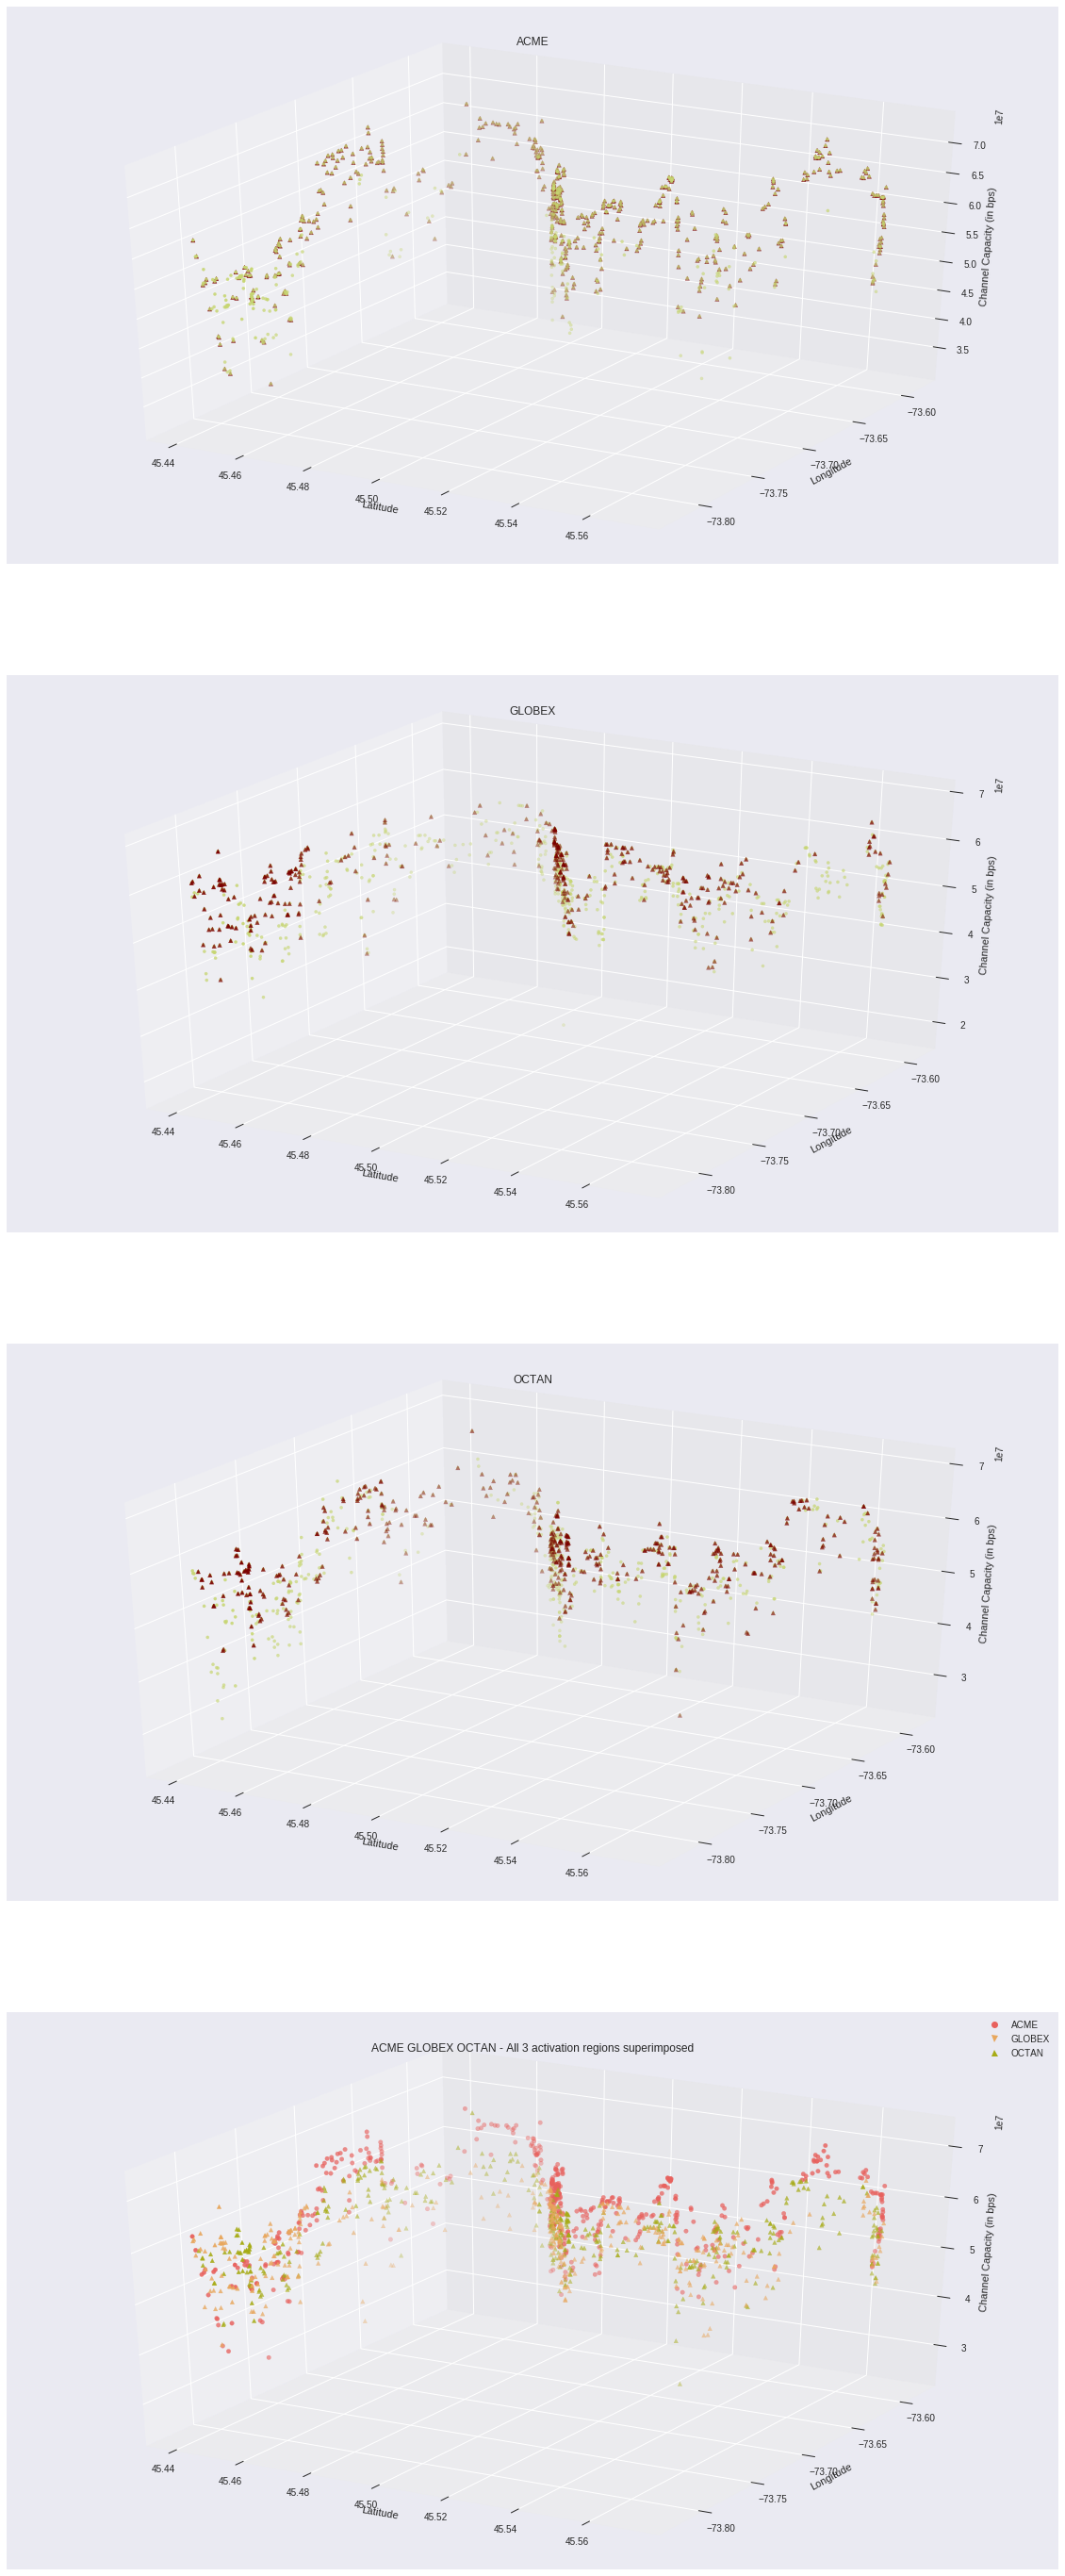

In [284]:
fig = plt.figure(figsize=plt.figaspect(25))
fig.set_figheight(50)
fig.set_figwidth(20)

# fig = plt.figure(figsize=plt.figaspect(10))
# fig.set_figheight(20)
# fig.set_figwidth(10)

ax = fig.add_subplot(4, 1, 1, projection='3d')
ax.scatter(x_arr, y_arr, z_acme_arr, c='#C7D672', marker='o', s=10)
ax.scatter(x_acme_selected, y_acme_selected, z_acme_selected, c='#7B0000', marker='^')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Channel Capacity (in bps)')
ax.set_title('ACME')

ax = fig.add_subplot(4, 1, 2, projection='3d')
ax.scatter(x_arr, y_arr, z_globex_arr, c='#C7D672', marker='o', s=10)
ax.scatter(x_globex_selected, y_globex_selected, z_globex_selected, c='#7B0000', marker='^')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Channel Capacity (in bps)')
ax.set_title('GLOBEX')

ax = fig.add_subplot(4, 1, 3, projection='3d')
ax.scatter(x_arr, y_arr, z_octan_arr, c='#C7D672', marker='o', s=10)
ax.scatter(x_octan_selected, y_octan_selected, z_octan_selected, c='#7B0000', marker='^')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Channel Capacity (in bps)')
ax.set_title('OCTAN')

colors = ['#E8615D', '#E8A75D', '#A7AC16']
ax = fig.add_subplot(4, 1, 4, projection='3d')
ax.scatter(x_acme_selected, y_acme_selected, z_acme_selected, c=colors[0], marker='o')
ax.scatter(x_globex_selected, y_globex_selected, z_globex_selected, c=colors[1], marker='^')
ax.scatter(x_octan_selected, y_octan_selected, z_octan_selected, c=colors[2], marker='^')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Channel Capacity (in bps)')
ax.set_title('ACME GLOBEX OCTAN - All 3 activation regions superimposed')

scatter1_proxy = Line2D([0],[0], linestyle="none", c=colors[0], marker = 'o')
scatter2_proxy = Line2D([0],[0], linestyle="none", c=colors[1], marker = 'v')
scatter3_proxy = Line2D([0],[0], linestyle="none", c=colors[2], marker = "^")
ax.legend([scatter1_proxy, scatter2_proxy, scatter3_proxy], ['ACME', 'GLOBEX', 'OCTAN'], numpoints = 1)

plt.show()
